<a href="https://colab.research.google.com/github/EmrahSezer/IBM---Applied-Data-Science-Capstone/blob/master/IzmirThessaloniki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install geopandas

     |████████████████████████████████| 972kB 8.0MB/s 
     |████████████████████████████████| 14.7MB 210kB/s 
     |████████████████████████████████| 10.9MB 53.5MB/s 


In [5]:
!pip install geopy

In [6]:
import geopy
import geopandas
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests
from bs4 import BeautifulSoup
import pandas as pd
import lxml
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
#import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [8]:
IzmirResponse = requests.get('https://tr.wikipedia.org/wiki/%C4%B0zmir%27in_il%C3%A7eleri')
#print(response.text)
#print(type(response.text))

In [9]:
soupIzmir = BeautifulSoup(IzmirResponse.text,'html.parser')
#print(soup.get_text())
#soup.a
#soup.p

In [10]:
SoupWikiTable=soupIzmir.find(class_='div-col columns column-count column-count-3')
#print(SoupWikiTable)

In [11]:
IzmirMunicipalities=[]
for url in SoupWikiTable.find_all('a'):
    IzmirMunicipalities.append(url.get('title'))
IzmirMunicipalities

['Aliağa',
 'Balçova',
 'Bayındır, İzmir',
 'Bayraklı',
 'Bergama',
 'Beydağ, İzmir',
 'Bornova',
 'Buca',
 'Çeşme, İzmir',
 'Çiğli',
 'Dikili',
 'Foça',
 'Gaziemir',
 'Güzelbahçe',
 'Karabağlar',
 'Karaburun',
 'Karşıyaka',
 'Kemalpaşa, İzmir',
 'Kınık, İzmir',
 'Kiraz, İzmir',
 'Konak, İzmir',
 'Menderes, İzmir',
 'Menemen',
 'Narlıdere',
 'Ödemiş',
 'Seferihisar',
 'Selçuk',
 'Tire, İzmir',
 'Torbalı',
 'Urla']

In [12]:
# Clearing Izmir from municipalities
for index,muni in enumerate(IzmirMunicipalities):
    IzmirMunicipalities[index]=muni.replace(', İzmir','')
IzmirMunicipalities=pd.DataFrame(IzmirMunicipalities,columns=['Municipalities'])
IzmirMunicipalities

,Municipalities
0,Aliağa
1,Balçova
2,Bayındır
3,Bayraklı
4,Bergama
5,Beydağ
6,Bornova
7,Buca
8,Çeşme
9,Çiğli


In [14]:
locator = Nominatim(user_agent='IzmirThessa')
Latitudes=[]
Longitudes=[]
for Muni in IzmirMunicipalities['Municipalities']:
    location = locator.geocode('{}, İzmir, Turkey'.format(Muni))
    Latitudes.append(location.latitude)
    Longitudes.append(location.longitude)
    
IzmirMunicipalities['Latitude']=Latitudes
IzmirMunicipalities['Longitude']=Longitudes

In [15]:
IzmirMunicipalities

,Municipalities,Latitude,Longitude
0,Aliağa,38.807137,27.051375
1,Balçova,38.380478,27.055728
2,Bayındır,38.220605,27.647298
3,Bayraklı,38.486739,27.149265
4,Bergama,39.119154,27.177730
5,Beydağ,38.095113,28.224275
6,Bornova,38.467898,27.260805
7,Buca,38.344461,27.262772
8,Çeşme,38.324418,26.302856
9,Çiğli,38.492077,26.994095


In [22]:
# Accessing Thessaloniki Wikipeida data
ThesResponse = requests.get('https://en.wikipedia.org/wiki/Thessaloniki_(regional_unit)')
soup = BeautifulSoup(ThesResponse.text,'html.parser')
SoupWikiTable=soup.find(class_='wikitable')

Thessaloniki = pd.read_html(str(SoupWikiTable))[0]
Thessaloniki

,New municipality,Old municipalities,Seat
0,Ampelokipoi-Menemeni,Ampelokipoi,Ampelokipoi
1,Ampelokipoi-Menemeni,Menemeni,Ampelokipoi
2,Chalkidona,Chalkidona,Koufalia
3,Chalkidona,Agios Athanasios,Koufalia
4,Chalkidona,Koufalia,Koufalia
5,Delta,Axios,Sindos
6,Delta,Echedoros,Sindos
7,Delta,Chalastra,Sindos
8,Kalamaria,Kalamaria,Kalamaria
9,Kordelio-Evosmos,Eleftherio-Kordelio,Evosmos


In [25]:
# Taking Seat of the Thessaloniki Municipalities 
ThessalonikiNewMunicipalities =[]
for i in Thessaloniki['Seat'].unique():
    ThessalonikiNewMunicipalities=ThessalonikiNewMunicipalities + i.split(sep='-')
ThessalonikiNewMunicipalities

['Ampelokipoi',
 'Koufalia',
 'Sindos',
 'Kalamaria',
 'Evosmos',
 'Lagkadas',
 'Sykies',
 'Oraiokastro',
 'Stavroupoli',
 'Panorama',
 'Peraia',
 'Thermi',
 'Thessaloniki',
 'Stavros']

In [26]:
# For a Pylaia geocode error fixing
for num,Muni in enumerate(ThessalonikiNewMunicipalities):
    if Muni=='Pylaia':
        ThessalonikiNewMunicipalities[num]='Πυλαίας'
ThessalonikiNewMunicipalities

['Ampelokipoi',
 'Koufalia',
 'Sindos',
 'Kalamaria',
 'Evosmos',
 'Lagkadas',
 'Sykies',
 'Oraiokastro',
 'Stavroupoli',
 'Panorama',
 'Peraia',
 'Thermi',
 'Thessaloniki',
 'Stavros']

In [27]:
# Adding Coordinates of the Thessaloniki Municipalities 
locator = Nominatim(user_agent='IzmirThessa')
ThesLatitudes=[]
ThesLongitudes=[]
for Muni in ThessalonikiNewMunicipalities:
    location = locator.geocode('{}, Thessaloniki, Greece'.format(Muni))
    #print(Muni)
    #print('{} Latitude = {}, Longitude = {}'.format(Muni,location.latitude, location.longitude))
    ThesLatitudes.append(location.latitude)
    ThesLongitudes.append(location.longitude)
ThessalonikiMunicipalities=pd.DataFrame(ThessalonikiNewMunicipalities,columns=['Municipalities'])
ThessalonikiMunicipalities['Latitude']=ThesLatitudes
ThessalonikiMunicipalities['Longitude']=ThesLongitudes
# Pylaia fixer
ThessalonikiMunicipalities=ThessalonikiMunicipalities.replace('Πυλαίας', 'Pylaia')
ThessalonikiMunicipalities

,Municipalities,Latitude,Longitude
0,Ampelokipoi,40.654552,22.923589
1,Koufalia,40.778644,22.577562
2,Sindos,40.670531,22.803130
3,Kalamaria,40.579875,22.952855
4,Evosmos,40.671266,22.916199
5,Lagkadas,40.749995,23.066761
6,Sykies,40.649673,22.953539
7,Oraiokastro,40.727322,22.914858
8,Stavroupoli,40.668533,22.932165
9,Panorama,40.586793,23.031612


In [28]:
# Merging Izmir data and Thessaloniki data
IzmThes_df= pd.concat([IzmirMunicipalities,ThessalonikiMunicipalities], ignore_index=True, sort=False)
IzmThes_df

,Municipalities,Latitude,Longitude
0,Aliağa,38.807137,27.051375
1,Balçova,38.380478,27.055728
2,Bayındır,38.220605,27.647298
3,Bayraklı,38.486739,27.149265
4,Bergama,39.119154,27.177730
5,Beydağ,38.095113,28.224275
6,Bornova,38.467898,27.260805
7,Buca,38.344461,27.262772
8,Çeşme,38.324418,26.302856
9,Çiğli,38.492077,26.994095


In [29]:
# Foursquare access informations
CLIENT_ID = 'NVBOPU30GUKRZNY3VWDBRJGGLR2DJN5MU3HU0ZJ3L3D0ACNT' #  Foursquare ID
CLIENT_SECRET = 'PT4IJFTLZGZCD3JR0LLCWBZ2C3YLDVA1K4F4MZ5OWI4NK3CF' #  Foursquare Secret
VERSION = '20180604'

In [55]:
# Explore and cluster the neighborhoods in Toronto.
def getNearbyVenues(names, latitudes, longitudes,LIMIT=12):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [56]:
IzmThes_df.columns

Index(['Municipalities', 'Latitude', 'Longitude'], dtype='object')

In [57]:
# Request Foursquare API
IzmThes_Venues= getNearbyVenues(
                                   names=IzmThes_df['Municipalities'],
                                   latitudes=IzmThes_df['Latitude'],
                                   longitudes=IzmThes_df['Longitude']
                               )

Aliağa
Balçova
Bayındır
Bayraklı
Bergama
Beydağ
Bornova
Buca
Çeşme
Çiğli
Dikili
Foça
Gaziemir
Güzelbahçe
Karabağlar
Karaburun
Karşıyaka
Kemalpaşa
Kınık
Kiraz
Konak
Menderes
Menemen
Narlıdere
Ödemiş
Seferihisar
Selçuk
Tire
Torbalı
Urla
Ampelokipoi
Koufalia
Sindos
Kalamaria
Evosmos
Lagkadas
Sykies
Oraiokastro
Stavroupoli
Panorama
Peraia
Thermi
Thessaloniki
Stavros


In [58]:
print(IzmThes_Venues.shape)
IzmThes_Venues.head()
#IzmThes_Venues

(528, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aliağa,38.807137,27.051375,İKA Menemen-Aliağa-Çandarlı Otoyolu Projesi Şa...,38.796922,27.008953,Construction & Landscaping
1,Aliağa,38.807137,27.051375,Çakırın Yeri,38.853298,27.033848,Breakfast Spot
2,Aliağa,38.807137,27.051375,Kyme Otel Restorant,38.824150,26.985690,Restaurant
3,Aliağa,38.807137,27.051375,Su İskelesi,38.822722,26.983722,Cocktail Bar
4,Aliağa,38.807137,27.051375,Bade,38.827273,26.982969,Beer Garden


In [59]:
IzmThes_Venues.groupby('Neighborhood').count()['Venue']

Neighborhood
Aliağa          12
Ampelokipoi     12
Balçova         12
Bayraklı        12
Bayındır        12
Bergama         12
Beydağ          12
Bornova         12
Buca            12
Dikili          12
Evosmos         12
Foça            12
Gaziemir        12
Güzelbahçe      12
Kalamaria       12
Karabağlar      12
Karaburun       12
Karşıyaka       12
Kemalpaşa       12
Kiraz           12
Konak           12
Koufalia        12
Kınık           12
Lagkadas        12
Menderes        12
Menemen         12
Narlıdere       12
Oraiokastro     12
Panorama        12
Peraia          12
Seferihisar     12
Selçuk          12
Sindos          12
Stavros         12
Stavroupoli     12
Sykies          12
Thermi          12
Thessaloniki    12
Tire            12
Torbalı         12
Urla            12
Çeşme           12
Çiğli           12
Ödemiş          12
Name: Venue, dtype: int64

In [60]:
print('There are {} uniques categories.'.format(len(IzmThes_Venues['Venue Category'].unique())))

There are 147 uniques categories.


In [61]:
# one hot encoding
IzmThes_onehot = pd.get_dummies(IzmThes_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
IzmThes_onehot['Neighborhood'] = IzmThes_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [IzmThes_onehot.columns[-1]] + list(IzmThes_onehot.columns[:-1])
IzmThes_onehot = IzmThes_onehot[fixed_columns]

print('IzmThes_onehot_shape=',IzmThes_onehot.shape)
IzmThes_onehot.head(10)

IzmThes_onehot_shape= (528, 148)


,Neighborhood,Airport,Arcade,Art Gallery,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bistro,Boarding House,Bookstore,Borek Place,Botanical Garden,Bougatsa Shop,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Butcher,Café,Camera Store,Campground,Castle,Cheese Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club,Cupcake Shop,Dance Studio,Daycare,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Doner Restaurant,Donut Shop,Electronics Store,Factory,Fair,Farm,Farmers Market,Fast Food Restaurant,Fish Taverna,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Go Kart Track,Gozleme Place,Greek Restaurant,Grilled Meat Restaurant,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Historic Site,History Museum,Hotel,Ice Cream Shop,Italian Restaurant,Jewelry Store,Kebab Restaurant,Kids Store,Kokoreç Restaurant,Lake,Lounge,Market,Mediterranean Restaurant,Men's Store,Meyhane,Meze Restaurant,Military Base,Mobile Phone Shop,Modern Greek Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Museum,Music Store,Nightclub,Other Great Outdoors,Ouzeri,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pet Store,Pharmacy,Pide Place,Pizza Place,Plaza,Pool,Pub,Public Art,Rental Car Location,Restaurant,Rock Climbing Spot,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Souvlaki Shop,Spa,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Söğüş Place,Taverna,Tea Room,Tennis Court,Theater,Theme Restaurant,Train Station,Turkish Coffeehouse,Turkish Home Cooking Restaurant,Turkish Restaurant,Vineyard,Waterfront,Wine Bar,Wings Joint,Zoo
0,Aliağa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Aliağa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Aliağa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Aliağa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Aliağa,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Aliağa,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Aliağa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [62]:
IzmThes_grouped = IzmThes_onehot.groupby('Neighborhood').mean().reset_index()
print(IzmThes_grouped.shape)
IzmThes_grouped

(44, 148)


,Neighborhood,Airport,Arcade,Art Gallery,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bistro,Boarding House,Bookstore,Borek Place,Botanical Garden,Bougatsa Shop,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Butcher,Café,Camera Store,Campground,Castle,Cheese Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club,Cupcake Shop,Dance Studio,Daycare,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Doner Restaurant,Donut Shop,Electronics Store,Factory,Fair,Farm,Farmers Market,Fast Food Restaurant,Fish Taverna,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Go Kart Track,Gozleme Place,Greek Restaurant,Grilled Meat Restaurant,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Historic Site,History Museum,Hotel,Ice Cream Shop,Italian Restaurant,Jewelry Store,Kebab Restaurant,Kids Store,Kokoreç Restaurant,Lake,Lounge,Market,Mediterranean Restaurant,Men's Store,Meyhane,Meze Restaurant,Military Base,Mobile Phone Shop,Modern Greek Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Museum,Music Store,Nightclub,Other Great Outdoors,Ouzeri,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pet Store,Pharmacy,Pide Place,Pizza Place,Plaza,Pool,Pub,Public Art,Rental Car Location,Restaurant,Rock Climbing Spot,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Souvlaki Shop,Spa,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Söğüş Place,Taverna,Tea Room,Tennis Court,Theater,Theme Restaurant,Train Station,Turkish Coffeehouse,Turkish Home Cooking Restaurant,Turkish Restaurant,Vineyard,Waterfront,Wine Bar,Wings Joint,Zoo
0,Aliağa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,0.00,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Ampelokipoi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [63]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [64]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = IzmThes_grouped['Neighborhood']

for ind in np.arange(IzmThes_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(IzmThes_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aliağa,Restaurant,Bookstore,Breakfast Spot,Construction & Landscaping,Hotel,Gym / Fitness Center,Coffee Shop,Cocktail Bar,Beach,Steakhouse
1,Ampelokipoi,Café,Gym / Fitness Center,Pub,Snack Place,Bougatsa Shop,Fast Food Restaurant,Souvlaki Shop,Clothing Store,Pizza Place,Daycare
2,Balçova,Café,Gym / Fitness Center,Kokoreç Restaurant,Gym,Park,Comfort Food Restaurant,Mountain,Motorcycle Shop,Food & Drink Shop,Boutique
3,Bayraklı,Turkish Restaurant,Doner Restaurant,Restaurant,Snack Place,Wings Joint,Park,Monument / Landmark,Café,Zoo,Diner
4,Bayındır,Cheese Shop,Train Station,Steakhouse,Restaurant,Café,Diner,Dessert Shop,Hotel,Smoke Shop,Turkish Coffeehouse
5,Bergama,Café,Public Art,Paper / Office Supplies Store,Mobile Phone Shop,Turkish Restaurant,Turkish Home Cooking Restaurant,Coffee Shop,Camera Store,Breakfast Spot,Jewelry Store
6,Beydağ,Park,Café,Tea Room,Diner,Mountain,Breakfast Spot,Turkish Restaurant,Turkish Coffeehouse,Bus Station,Electronics Store
7,Bornova,Park,Gym,Food Truck,Pool,Restaurant,Deli / Bodega,Breakfast Spot,Kebab Restaurant,Pastry Shop,Gym / Fitness Center
8,Buca,Breakfast Spot,Steakhouse,Rock Climbing Spot,Go Kart Track,Turkish Restaurant,Plaza,Garden,Electronics Store,Donut Shop,Doner Restaurant
9,Dikili,Diner,Food Court,Arcade,Pide Place,Auto Garage,Fast Food Restaurant,Coffee Shop,Cosmetics Shop,Botanical Garden,Steakhouse


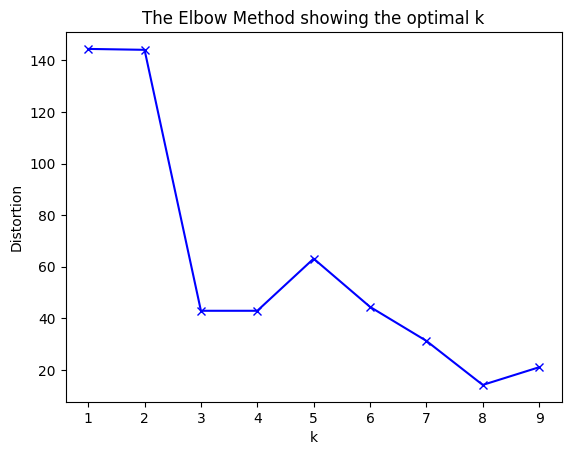

[144.42552645315638, 144.07712257690204, 42.93208874458875, 42.93208874458875, 63.13641051496998, 44.44982290436837, 31.265293654651945, 14.194696969696965, 21.0475665748393]


In [65]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

IzmThes_grouped_clustering = IzmThes_grouped.drop('Neighborhood', 1)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init="k-means++",random_state=42).fit(IzmThes_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(IzmThes_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / IzmThes_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.05681855542631025
For n_clusters = 3 The average silhouette_score is : 0.0713225535444246
For n_clusters = 4 The average silhouette_score is : 0.0657125128584344
For n_clusters = 5 The average silhouette_score is : 0.06047416545871338
For n_clusters = 6 The average silhouette_score is : 0.05516778078102227
For n_clusters = 7 The average silhouette_score is : 0.04095650047489114
For n_clusters = 8 The average silhouette_score is : 0.04641864029249359
For n_clusters = 9 The average silhouette_score is : 0.05584052661265438


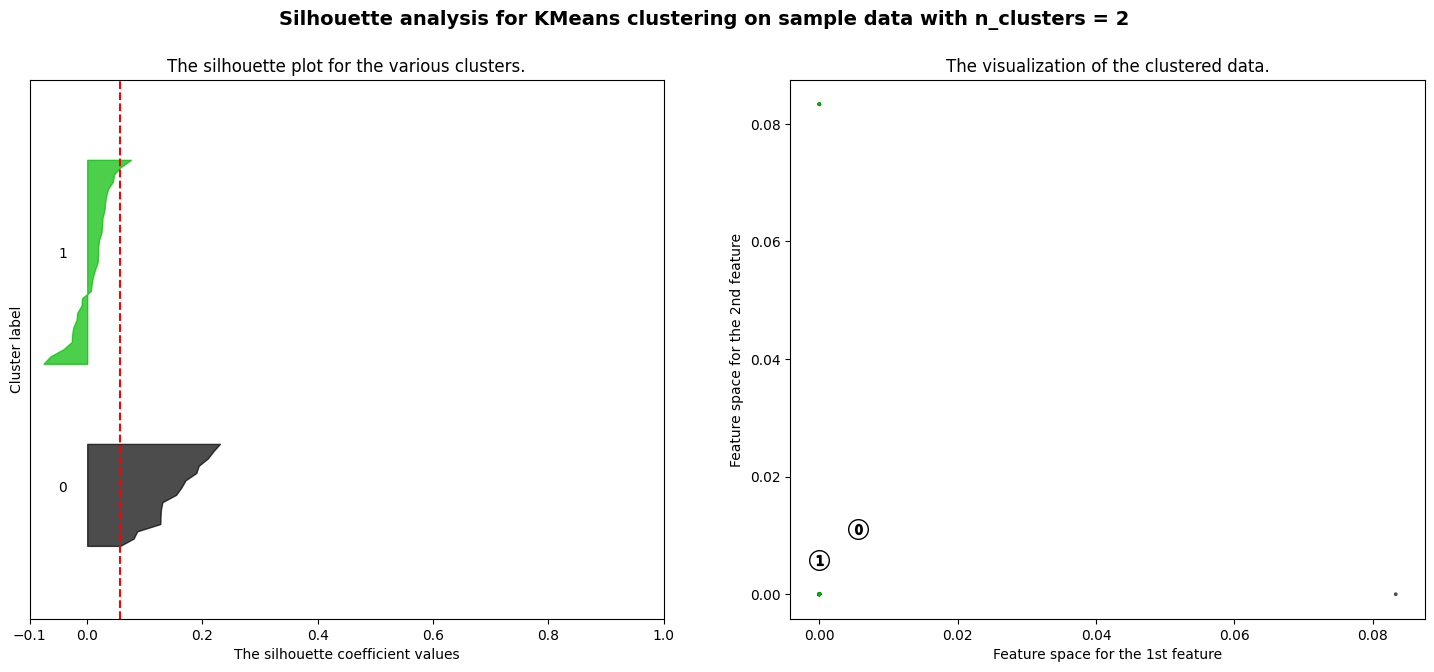

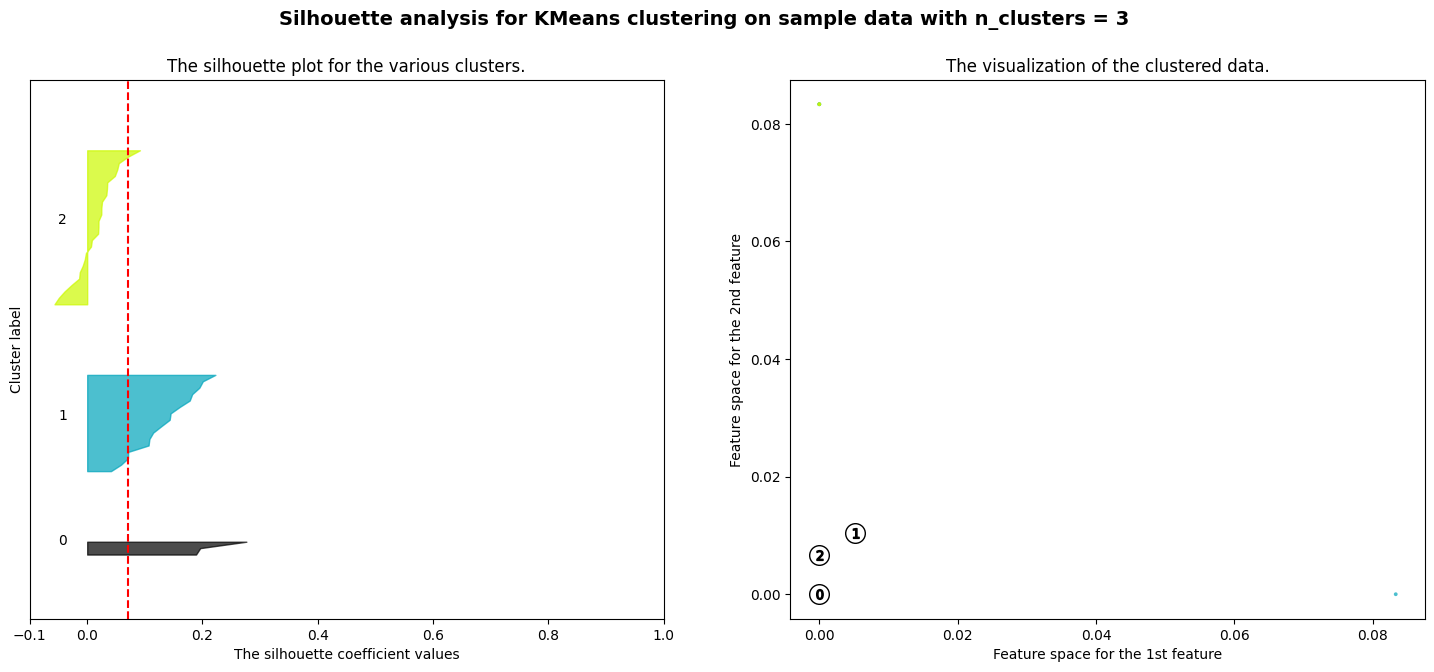

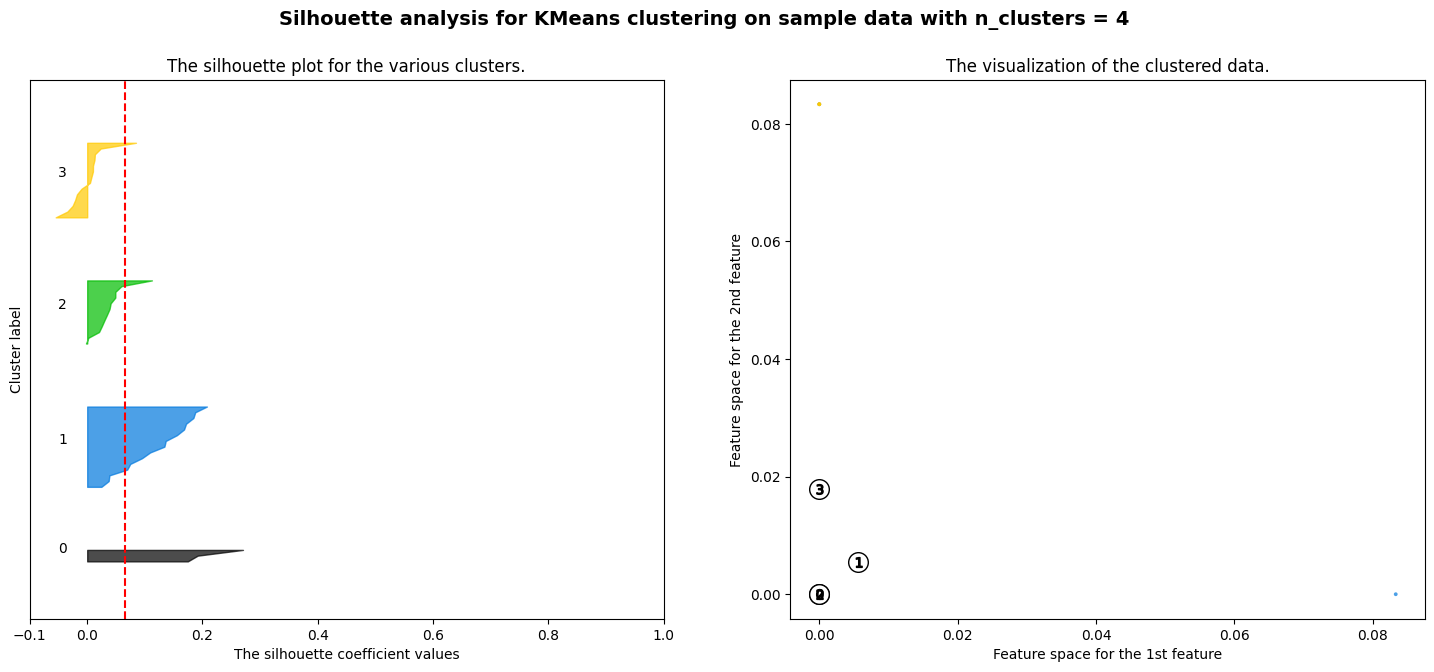

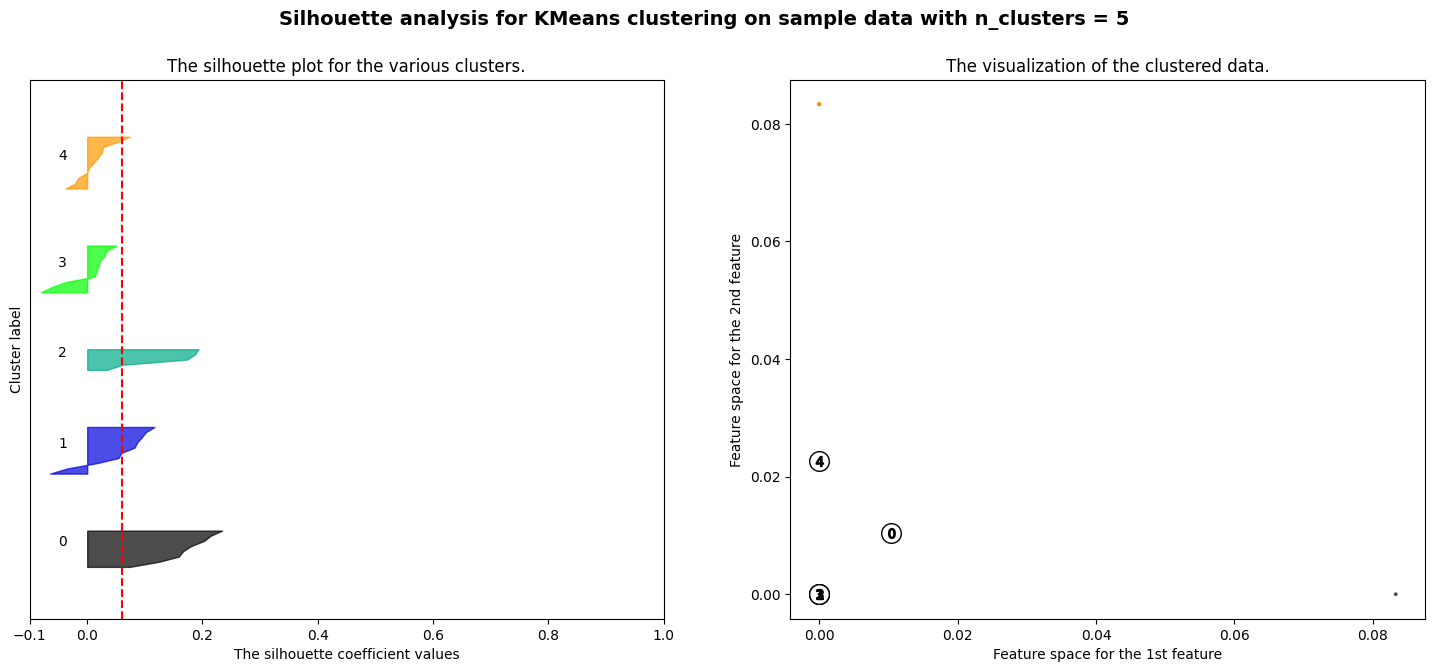

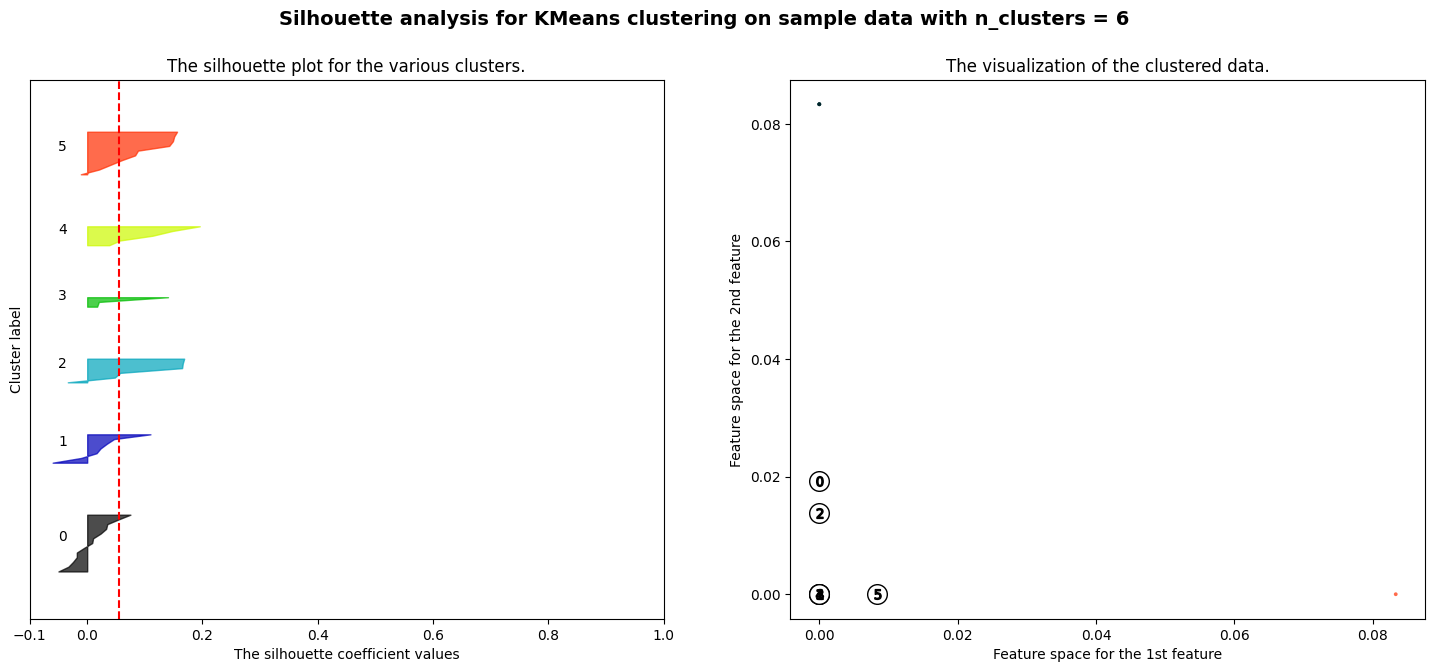

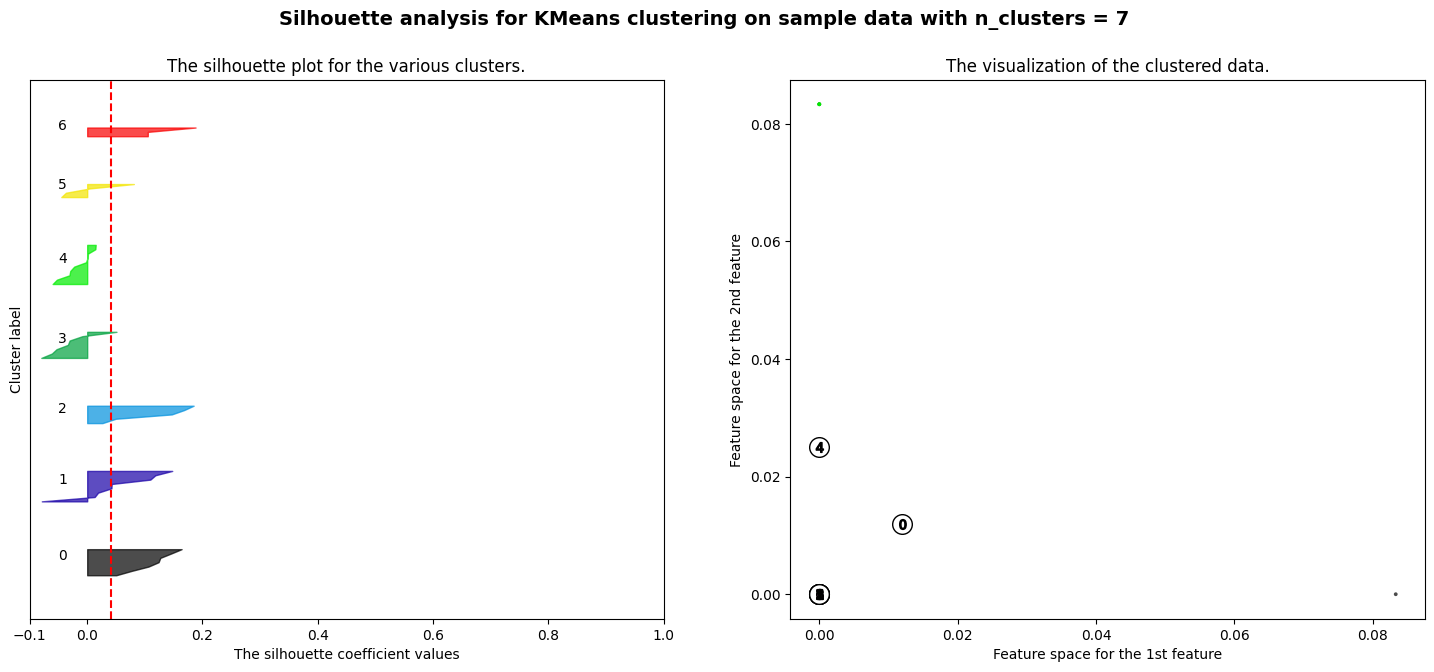

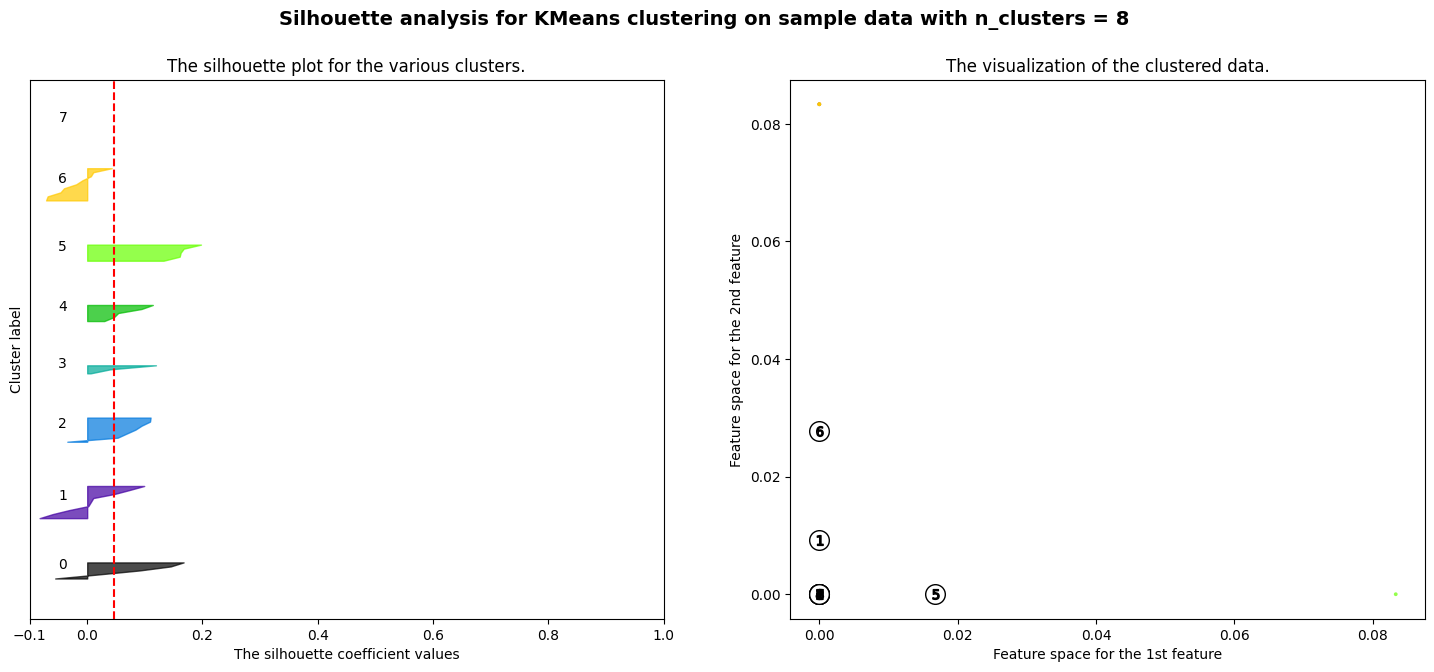

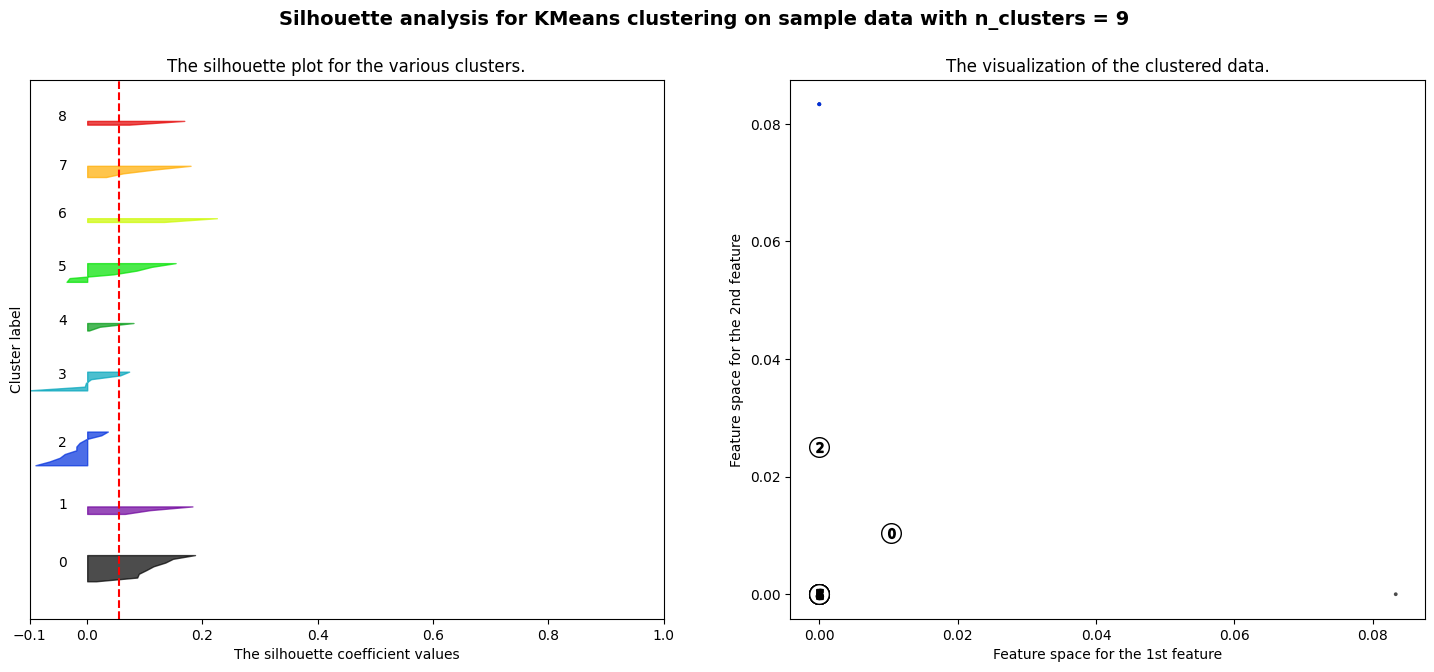

In [66]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=IzmThes_grouped_clustering.to_numpy() 

range_n_clusters = list(range(2,10))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init="k-means++",random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [67]:
# set number of clusters
kclusters = 3
IzmThes_grouped_clustering = IzmThes_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init="k-means++",random_state=42).fit(IzmThes_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2],
      dtype=int32)

In [68]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

IzmThes_merged = IzmThes_df

# merge IzmThes_merged with neighborhoods_venues_sorted to add latitude/longitude for each Municipalities
IzmThes_merged = IzmThes_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Municipalities')

IzmThes_merged.head() # check the last columns!

,Municipalities,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aliağa,38.807137,27.051375,2,Restaurant,Bookstore,Breakfast Spot,Construction & Landscaping,Hotel,Gym / Fitness Center,Coffee Shop,Cocktail Bar,Beach,Steakhouse
1,Balçova,38.380478,27.055728,1,Café,Gym / Fitness Center,Kokoreç Restaurant,Gym,Park,Comfort Food Restaurant,Mountain,Motorcycle Shop,Food & Drink Shop,Boutique
2,Bayındır,38.220605,27.647298,1,Cheese Shop,Train Station,Steakhouse,Restaurant,Café,Diner,Dessert Shop,Hotel,Smoke Shop,Turkish Coffeehouse
3,Bayraklı,38.486739,27.149265,1,Turkish Restaurant,Doner Restaurant,Restaurant,Snack Place,Wings Joint,Park,Monument / Landmark,Café,Zoo,Diner
4,Bergama,39.119154,27.177730,1,Café,Public Art,Paper / Office Supplies Store,Mobile Phone Shop,Turkish Restaurant,Turkish Home Cooking Restaurant,Coffee Shop,Camera Store,Breakfast Spot,Jewelry Store


In [69]:
address = 'izmir'
geolocator = Nominatim(user_agent="IzmirThessaloniki")
location = geolocator.geocode(address)
Izmlatitude = location.latitude
Izmlongitude = location.longitude
print('The geograpical coordinate of Izmir City are {}, {}.'.format(Izmlatitude, Izmlongitude))
address = 'Thessaloniki'
geolocator = Nominatim(user_agent="IzmirThessaloniki")
location = geolocator.geocode(address)
Theslatitude = location.latitude
Theslongitude = location.longitude
print('The geograpical coordinate of Thessaloniki City are {}, {}.'.format(Theslatitude, Theslongitude))
# Find the midpoint of Izmir and Thessaloniki
latitude= (Izmlatitude+Theslatitude)/2
longitude= (Izmlongitude+Theslongitude)/2
print('The geograpical coordinate of Midpoint are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Izmir City are 38.4147331, 27.1434119.
The geograpical coordinate of Thessaloniki City are 40.6403167, 22.9352716.
The geograpical coordinate of Midpoint are 39.5275249, 25.03934175.


In [70]:
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i*0.7) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(IzmThes_merged['Latitude'], IzmThes_merged['Longitude'], IzmThes_merged['Municipalities'], IzmThes_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup1=label,
        color=rainbow[int(cluster)-2],
        fill=True,
        fill_color=rainbow[int(cluster)-2],
        fill_opacity=1).add_to(map_clusters)

map_clusters

In [71]:
Cluster1=IzmThes_merged[IzmThes_merged['Cluster Labels']==0].reset_index(drop=True)
Cluster1

,Municipalities,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Buca,38.344461,27.262772,0,Breakfast Spot,Steakhouse,Rock Climbing Spot,Go Kart Track,Turkish Restaurant,Plaza,Garden,Electronics Store,Donut Shop,Doner Restaurant
1,Foça,38.670049,26.858567,0,Breakfast Spot,Steakhouse,Farm,Pide Place,Gozleme Place,Butcher,Basketball Court,Supermarket,Cheese Shop,Fishing Spot
2,Menderes,38.149147,27.106591,0,Restaurant,Steakhouse,Farm,Breakfast Spot,Lake,Scenic Lookout,Forest,BBQ Joint,Cosmetics Shop,Factory


In [72]:
Cluster2=IzmThes_merged[IzmThes_merged['Cluster Labels']==1].reset_index(drop=True)
Cluster2

,Municipalities,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Balçova,38.380478,27.055728,1,Café,Gym / Fitness Center,Kokoreç Restaurant,Gym,Park,Comfort Food Restaurant,Mountain,Motorcycle Shop,Food & Drink Shop,Boutique
1,Bayındır,38.220605,27.647298,1,Cheese Shop,Train Station,Steakhouse,Restaurant,Café,Diner,Dessert Shop,Hotel,Smoke Shop,Turkish Coffeehouse
2,Bayraklı,38.486739,27.149265,1,Turkish Restaurant,Doner Restaurant,Restaurant,Snack Place,Wings Joint,Park,Monument / Landmark,Café,Zoo,Diner
3,Bergama,39.119154,27.177730,1,Café,Public Art,Paper / Office Supplies Store,Mobile Phone Shop,Turkish Restaurant,Turkish Home Cooking Restaurant,Coffee Shop,Camera Store,Breakfast Spot,Jewelry Store
4,Beydağ,38.095113,28.224275,1,Park,Café,Tea Room,Diner,Mountain,Breakfast Spot,Turkish Restaurant,Turkish Coffeehouse,Bus Station,Electronics Store
5,Çiğli,38.492077,26.994095,1,Café,Zoo,Steakhouse,Coffee Shop,Garden,Kids Store,Military Base,Restaurant,Airport,Turkish Coffeehouse
6,Gaziemir,38.321982,27.132703,1,Gym,Café,Rental Car Location,Cosmetics Shop,Art Gallery,Bar,Ice Cream Shop,Dessert Shop,Mobile Phone Shop,Restaurant
7,Kınık,39.043778,27.383937,1,Café,Turkish Restaurant,Restaurant,Pizza Place,Steakhouse,Bar,Beer Garden,Breakfast Spot,Dive Bar,Factory
8,Seferihisar,38.198330,26.839100,1,Café,Pet Store,Furniture / Home Store,Farmers Market,Supermarket,Restaurant,Mobile Phone Shop,Smoke Shop,History Museum,Gym / Fitness Center
9,Tire,38.087815,27.721173,1,Gym,Bar,Shopping Mall,Shop & Service,Sandwich Place,Café,Snack Place,Museum,Breakfast Spot,Dance Studio


In [73]:
Cluster3=IzmThes_merged[IzmThes_merged['Cluster Labels']==2].reset_index(drop=True)
Cluster3

,Municipalities,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aliağa,38.807137,27.051375,2,Restaurant,Bookstore,Breakfast Spot,Construction & Landscaping,Hotel,Gym / Fitness Center,Coffee Shop,Cocktail Bar,Beach,Steakhouse
1,Bornova,38.467898,27.260805,2,Park,Gym,Food Truck,Pool,Restaurant,Deli / Bodega,Breakfast Spot,Kebab Restaurant,Pastry Shop,Gym / Fitness Center
2,Çeşme,38.324418,26.302856,2,Seafood Restaurant,Hotel,Meyhane,Waterfront,Turkish Restaurant,Historic Site,History Museum,Ice Cream Shop,Söğüş Place,Bed & Breakfast
3,Dikili,39.078833,26.929873,2,Diner,Food Court,Arcade,Pide Place,Auto Garage,Fast Food Restaurant,Coffee Shop,Cosmetics Shop,Botanical Garden,Steakhouse
4,Güzelbahçe,38.362744,26.886187,2,Kebab Restaurant,Theme Restaurant,Factory,Market,Steakhouse,Supermarket,Lounge,Breakfast Spot,Restaurant,Fair
5,Karabağlar,38.369771,27.104592,2,Bakery,Gym,Kebab Restaurant,Plaza,Music Store,Sandwich Place,Scenic Lookout,Seafood Restaurant,Doner Restaurant,Steakhouse
6,Karaburun,38.558789,26.470023,2,Beach,Other Great Outdoors,Waterfront,Coffee Shop,Plaza,Hotel,Café,Scenic Lookout,Bed & Breakfast,Diner
7,Karşıyaka,38.503471,27.113483,2,Gym / Fitness Center,Gym,Tennis Court,Gym Pool,Paintball Field,Scenic Lookout,Soccer Field,Mountain,Diner,Electronics Store
8,Kemalpaşa,38.423773,27.527273,2,Bakery,Kebab Restaurant,Nightclub,Café,Botanical Garden,Steakhouse,Food Court,Forest,Shopping Mall,BBQ Joint
9,Kiraz,38.228435,28.314383,2,Seafood Restaurant,Farm,Park,Vineyard,Farmers Market,Convenience Store,Garden,Electronics Store,Bay,Mobile Phone Shop


In [74]:
Cluster1List= Cluster1.drop(['Municipalities','Latitude','Longitude','Cluster Labels'], axis=1).values.tolist()
Cluster2List= Cluster2.drop(['Municipalities','Latitude','Longitude','Cluster Labels'], axis=1).values.tolist()
Cluster3List= Cluster3.drop(['Municipalities','Latitude','Longitude','Cluster Labels'], axis=1).values.tolist()

In [75]:
MergedCluster1List=[]
MergedCluster2List=[]
MergedCluster3List=[]


for i in Cluster1List:
    for j in i:
        MergedCluster1List.append(j)
        
for i in Cluster2List:
    for j in i:
        MergedCluster2List.append(j)
        
for i in Cluster3List:
    for j in i:
        MergedCluster3List.append(j)

In [76]:
pd.DataFrame(MergedCluster1List)[0].value_counts()

Steakhouse            3
Breakfast Spot        3
Farm                  2
Cheese Shop           1
Rock Climbing Spot    1
BBQ Joint             1
Plaza                 1
Basketball Court      1
Restaurant            1
Gozleme Place         1
Electronics Store     1
Scenic Lookout        1
Pide Place            1
Cosmetics Shop        1
Lake                  1
Fishing Spot          1
Butcher               1
Garden                1
Doner Restaurant      1
Forest                1
Go Kart Track         1
Factory               1
Supermarket           1
Turkish Restaurant    1
Donut Shop            1
Name: 0, dtype: int64

In [77]:
pd.DataFrame(MergedCluster2List)[0].value_counts()

Café                               16
Restaurant                          7
Bar                                 7
Gym / Fitness Center                5
Coffee Shop                         5
Mobile Phone Shop                   5
Turkish Restaurant                  4
Pizza Place                         4
Breakfast Spot                      4
Park                                3
Steakhouse                          3
Gym                                 3
Supermarket                         3
Diner                               3
Turkish Coffeehouse                 3
History Museum                      3
Fast Food Restaurant                3
Snack Place                         3
Dance Studio                        3
Taverna                             2
Dessert Shop                        2
Hotel                               2
Fish Taverna                        2
Factory                             2
Zoo                                 2
Bougatsa Shop                       2
Smoke Shop  

In [639]:
pd.DataFrame(MergedCluster3List)[0].value_counts()

Restaurant                         8
Steakhouse                         7
Breakfast Spot                     7
Gym / Fitness Center               5
Turkish Restaurant                 5
Dessert Shop                       5
Gym                                4
Café                               4
Garden                             4
Park                               4
Cheese Shop                        3
Pool                               3
Supermarket                        3
Kebab Restaurant                   3
Scenic Lookout                     3
Sandwich Place                     2
Bakery                             2
BBQ Joint                          2
Kokoreç Restaurant                 2
Mountain                           2
Farm                               2
Cupcake Shop                       2
Coffee Shop                        2
Fair                               2
Shopping Mall                      2
Smoke Shop                         2
Diner                              2
S

In [84]:
# Adding cluster labels to the modelling data
IzmThes_grouped_clustering.insert(0, 'Cluster Labels', kmeans.labels_)

In [85]:
# Roughly looking to venue distrubution of the clusters
ClusterDetailsGroupBy=IzmThes_grouped_clustering.groupby(['Cluster Labels']).mean()
ClusterDetailsGroupBy

,Airport,Arcade,Art Gallery,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Bay,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bistro,Boarding House,Bookstore,Borek Place,Botanical Garden,Bougatsa Shop,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Butcher,Café,Camera Store,Campground,Castle,Cheese Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club,Cupcake Shop,Dance Studio,Daycare,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Doner Restaurant,Donut Shop,Electronics Store,Factory,Fair,Farm,Farmers Market,Fast Food Restaurant,Fish Taverna,Fishing Spot,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Forest,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gastropub,Go Kart Track,Gozleme Place,Greek Restaurant,Grilled Meat Restaurant,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Historic Site,History Museum,Hotel,Ice Cream Shop,Italian Restaurant,Jewelry Store,Kebab Restaurant,Kids Store,Kokoreç Restaurant,Lake,Lounge,Market,Mediterranean Restaurant,Men's Store,Meyhane,Meze Restaurant,Military Base,Mobile Phone Shop,Modern Greek Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Museum,Music Store,Nightclub,Other Great Outdoors,Ouzeri,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Pet Store,Pharmacy,Pide Place,Pizza Place,Plaza,Pool,Pub,Public Art,Rental Car Location,Restaurant,Rock Climbing Spot,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Souvlaki Shop,Spa,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Söğüş Place,Taverna,Tea Room,Tennis Court,Theater,Theme Restaurant,Train Station,Turkish Coffeehouse,Turkish Home Cooking Restaurant,Turkish Restaurant,Vineyard,Waterfront,Wine Bar,Wings Joint,Zoo
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.027778,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.00,0.027778,0.000000,0.000000,0.027778,0.000000,0.027778,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.055556,0.027778,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.005208,0.010417,0.005208,0.000000,0.000000,0.000000,0.052083,0.000000,0.000000,0.00,0.000000,0.000000,0.005208,0.000000,0.000000,0.000000,0.00,0.000000,0.010417,0.005208,0.020833,0.005208,0.000000,0.005208,0.000000,0.182292,0.005208,0.000000,0.000000,0.005208,0.000000,0.005208,0.005208,0.026042,0.000000,0.005208,0.000000,0.000000,0.005208,0.000000,0.000000,0.005208,0.000000,0.000000,0.010417,0.010417,0.000000,0.010417,0.000000,0.000000,0.005208,0.000000,0.000000,0.005208,0.015625,0.010417,0.000000,0.000000,0.005208,0.000000,0.00,0.000000,0.000000,0.005208,0.005208,0.000000,0.000000,0.000000,0.015625,0.005208,0.020833,0.036458,0.000000,0.00000

In [86]:
# Venues of the cluster 1
Cluster1Venues=pd.DataFrame(ClusterDetailsGroupBy.iloc[0].sort_values(ascending=False))
Cluster1Venues.columns=['Ratio']
Cluster1Venues=Cluster1Venues[Cluster1Venues['Ratio']>0].index
Cluster1Venues

Index(['Breakfast Spot', 'Steakhouse', 'Farm', 'Restaurant', 'Fishing Spot',
       'Pide Place', 'Cheese Shop', 'Plaza', 'Rock Climbing Spot', 'Butcher',
       'Scenic Lookout', 'Lake', 'Supermarket', 'Gozleme Place',
       'Go Kart Track', 'Forest', 'Garden', 'Basketball Court',
       'Turkish Restaurant', 'BBQ Joint'],
      dtype='object')

In [87]:
# Venues of the cluster 2
Cluster2Venues=pd.DataFrame(ClusterDetailsGroupBy.iloc[1].sort_values(ascending=False))
Cluster2Venues.columns=['Ratio']
Cluster2Venues=Cluster2Venues[Cluster2Venues['Ratio']>0].index
Cluster2Venues

Index(['Café', 'Bar', 'Restaurant', 'Turkish Restaurant',
       'Gym / Fitness Center', 'Pizza Place', 'Coffee Shop',
       'Mobile Phone Shop', 'Gym', 'Park', 'Breakfast Spot', 'History Museum',
       'Steakhouse', 'Snack Place', 'Greek Restaurant', 'Fast Food Restaurant',
       'Museum', 'Supermarket', 'Turkish Coffeehouse', 'Doner Restaurant',
       'Mountain', 'Hotel', 'Souvlaki Shop', 'Taverna', 'Tea Room',
       'Smoke Shop', 'Shopping Mall', 'Ice Cream Shop', 'Bougatsa Shop',
       'Turkish Home Cooking Restaurant', 'Fish Taverna', 'Arcade',
       'Dessert Shop', 'Diner', 'Zoo', 'Grilled Meat Restaurant',
       'Wings Joint', 'Historic Site', 'Furniture / Home Store',
       'Jewelry Store', 'Garden', 'Cosmetics Shop', 'Food & Drink Shop',
       'Farmers Market', 'Factory', 'Dance Studio', 'Kokoreç Restaurant',
       'Comfort Food Restaurant', 'Cocktail Bar', 'Clothing Store',
       'Cheese Shop', 'Camera Store', 'Bus Station', 'Brewery', 'Boutique',
       'Beer Gar

In [88]:
# Venues of the cluster 3
Cluster3Venues=pd.DataFrame(ClusterDetailsGroupBy.iloc[2].sort_values(ascending=False))
Cluster3Venues.columns=['Ratio']
Cluster3Venues=Cluster3Venues[Cluster3Venues['Ratio']>0].index
Cluster3Venues

Index(['Hotel', 'Bakery', 'Bar', 'Seafood Restaurant', 'Gym',
       'Greek Restaurant', 'Restaurant', 'Coffee Shop', 'Steakhouse', 'Beach',
       ...
       'Smoke Shop', 'Boutique', 'Soccer Field', 'Gastropub', 'Souvlaki Shop',
       'Furniture / Home Store', 'Frozen Yogurt Shop', 'Forest', 'Auto Garage',
       'Stadium'],
      dtype='object', length=118)

In [90]:
# The venues are only belog to cluster 1.
Cluster1VenuesOnly=(Cluster1Venues.difference(Cluster3Venues)).difference(Cluster2Venues)
Cluster1VenuesOnly

Index(['Basketball Court', 'Butcher', 'Fishing Spot', 'Go Kart Track',
       'Gozleme Place', 'Lake', 'Rock Climbing Spot'],
      dtype='object')

In [92]:
# Finding the Locations in the cluster 2 but not in other clusters.
Cluster2VenuesOnly=(Cluster2Venues.difference(Cluster1Venues)).difference(Cluster3Venues)
Cluster2VenuesOnly

Index(['Airport', 'Brewery', 'Bus Station', 'Camera Store', 'Dance Studio',
       'Jewelry Store', 'Kids Store', 'Military Base', 'Monument / Landmark',
       'Museum', 'Paper / Office Supplies Store', 'Pet Store', 'Pizza Place',
       'Public Art', 'Rental Car Location', 'Shop & Service', 'Snack Place',
       'Spa', 'Train Station', 'Turkish Coffeehouse', 'Wings Joint', 'Zoo'],
      dtype='object')

In [93]:
# Finding the Locations in the cluster 3 but not in other clusters.
Cluster3VenuesOnly=(Cluster3Venues.difference(Cluster1Venues)).difference(Cluster2Venues)
Cluster3VenuesOnly

Index(['Auto Garage', 'Bakery', 'Bay', 'Beach', 'Beach Bar', 'Bed & Breakfast',
       'Bistro', 'Boarding House', 'Bookstore', 'Borek Place',
       'Botanical Garden', 'Burger Joint', 'Campground', 'Castle', 'Church',
       'College Quad', 'Construction & Landscaping', 'Convenience Store',
       'Country Dance Club', 'Cupcake Shop', 'Daycare', 'Deli / Bodega',
       'Dive Bar', 'Donut Shop', 'Electronics Store', 'Fair', 'Flower Shop',
       'Food Court', 'Food Truck', 'Frozen Yogurt Shop', 'Gastropub',
       'Gym Pool', 'Health Food Store', 'Italian Restaurant',
       'Kebab Restaurant', 'Lounge', 'Market', 'Mediterranean Restaurant',
       'Men's Store', 'Meyhane', 'Meze Restaurant', 'Modern Greek Restaurant',
       'Music Store', 'Other Great Outdoors', 'Paintball Field', 'Pastry Shop',
       'Pedestrian Plaza', 'Pharmacy', 'Seafood Restaurant', 'Soccer Field',
       'Stadium', 'Surf Spot', 'Sushi Restaurant', 'Söğüş Place',
       'Tennis Court', 'Theater', 'Theme Restau

In [94]:
Cluster3View=IzmThes_grouped_clustering[Cluster3VenuesOnly]
Cluster3View.insert(0, 'Cluster Labels', kmeans.labels_)
Cluster3View[Cluster3View['Cluster Labels']==2]

,Cluster Labels,Auto Garage,Bakery,Bay,Beach,Beach Bar,Bed & Breakfast,Bistro,Boarding House,Bookstore,Borek Place,Botanical Garden,Burger Joint,Campground,Castle,Church,College Quad,Construction & Landscaping,Convenience Store,Country Dance Club,Cupcake Shop,Daycare,Deli / Bodega,Dive Bar,Donut Shop,Electronics Store,Fair,Flower Shop,Food Court,Food Truck,Frozen Yogurt Shop,Gastropub,Gym Pool,Health Food Store,Italian Restaurant,Kebab Restaurant,Lounge,Market,Mediterranean Restaurant,Men's Store,Meyhane,Meze Restaurant,Modern Greek Restaurant,Music Store,Other Great Outdoors,Paintball Field,Pastry Shop,Pedestrian Plaza,Pharmacy,Seafood Restaurant,Soccer Field,Stadium,Surf Spot,Sushi Restaurant,Söğüş Place,Tennis Court,Theater,Theme Restaurant,Vineyard,Waterfront,Wine Bar
0,2,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.00,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,2,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
13,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000
14,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0

In [95]:
Cluster2View=IzmThes_grouped_clustering[Cluster2VenuesOnly]
Cluster2View.insert(0, 'Cluster Labels', kmeans.labels_)
Cluster2View[Cluster2View['Cluster Labels']==1]

,Cluster Labels,Airport,Brewery,Bus Station,Camera Store,Dance Studio,Jewelry Store,Kids Store,Military Base,Monument / Landmark,Museum,Paper / Office Supplies Store,Pet Store,Pizza Place,Public Art,Rental Car Location,Shop & Service,Snack Place,Spa,Train Station,Turkish Coffeehouse,Wings Joint,Zoo
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000
4,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000
5,1,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000
12,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000


In [96]:
Cluster2View=IzmThes_grouped_clustering[Cluster2VenuesOnly]
Cluster2View.insert(0, 'Cluster Labels', kmeans.labels_)
Cluster2View[Cluster2View['Cluster Labels']==1]

,Cluster Labels,Airport,Brewery,Bus Station,Camera Store,Dance Studio,Jewelry Store,Kids Store,Military Base,Monument / Landmark,Museum,Paper / Office Supplies Store,Pet Store,Pizza Place,Public Art,Rental Car Location,Shop & Service,Snack Place,Spa,Train Station,Turkish Coffeehouse,Wings Joint,Zoo
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000
4,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000
5,1,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000
12,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000


https://tr.wikipedia.org/wiki/%C4%B0zmir%27in_il%C3%A7eleri

https://en.wikipedia.org/wiki/Thessaloniki_(regional_unit)

https://www.familysearch.org/wiki/en/Thessaloniki_County,_Greece_Genealogy

https://en.wikipedia.org/wiki/Thessaloniki_Province

https://pypi.org/project/geopy/

https://towardsdatascience.com/geocode-with-python-161ec1e62b89

https://github.com/Srcanyildiz/istanbul/blob/master/Istanbul.ipynb

https://www.linkedin.com/pulse/housing-sales-prices-venues-data-analysis-ofistanbul-sercan-y%C4%B1ld%C4%B1z/

https://geo.nyu.edu/catalog/stanford-nj696zj1674

https://www.etranslation.gr/commonalities-across-borders-observations-thessaloniki-greece-izmir-turkey/